<a href="https://colab.research.google.com/github/Sachin-D-N/Amazon_Food_Reviews/blob/main/03.NaiveBayes_Amazon_Food_reviews/NaiveBayes_Amazon_Food_reviews_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




#  Assignment : Apply Naive Bayes

<ol>
    <li><strong>Apply Multinomial NaiveBayes on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning(find best Alpha)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Consider a wide range of alpha values for hyperparameter tuning, start as low as 0.00001</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Find the top 10 features of positive class and top 10 features of negative class for both feature sets <font color='red'>Set 1</font> and <font color='red'>Set 2</font> using values of `feature_log_prob_` parameter of  <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>MultinomialNB</a> and print their corresponding feature names</li>
        </ul>
    </li>
    <br>
            <ul>
            <li>Taking length of reviews as another feature.</li>
            <li>Considering some features from review summary as well.</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure. Here on X-axis you will have alpha values, since they have a wide range, just to represent those alpha values on the graph, apply log function on those alpha values.
     </li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    </li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using 
        <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
  
</ol>

###  we already strored the preprocessed_data in a file to know the preprocessing steps visit <a href='https://github.com/Sachin-D-N/Amazon_Food_Reviews/blob/main/01.Amazon_Fine_Food_Review_Analysis_Featurization/Amazon%20Fine%20Food%20Reviews%20Analysis.ipynb'>here </a>

In [ ]:
#loading Libraries
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#load the preprocessed data 
data=pd.read_csv('/content/drive/My Drive/preprocessed_data.csv' )

In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_reviews,preprocessed_summary
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...,everi book educ
1,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...,love book miss hard cover version
2,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...,chicken soup rice month
3,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read aloud nice rhythm well g...,good swingi rhythm read aloud
4,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...,great way learn month


In [ ]:
#use preprocessed_reviews and score for building a model
X=data['preprocessed_reviews'].values
Y=data['Score'].values

In [ ]:
print(X.shape)
print(Y.shape)

(364171,)
(364171,)


# Applying NaviveBayes on BOW Features

In [ ]:
#define a function for splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(254919,) (254919,)
(109252,) (109252,)


In [ ]:
#Apply Bow Features on Splitted data
from sklearn.feature_extraction.text import CountVectorizer
Vect=CountVectorizer()
X_train_Bow=Vect.fit_transform(X_train)
X_test_Bow=Vect.transform(X_test)
print(X_train_Bow.shape,Y_train.shape)
print(X_test_Bow.shape,Y_test.shape)

(254919, 71790) (254919,)
(109252, 71790) (109252,)


In [ ]:
X_train=X_train_Bow
X_test=X_test_Bow

In [ ]:
#hyperparameter tuning for find optimal_K
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,roc_curve,auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Grid Search Cross validation for hyper_parameter tuning
def Grid_search(X_train,Y_train):
    cv=KFold(n_splits=5) #defining the K-fold cross validation
    alpha_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5
    model=MultinomialNB()
    parameters = {'alpha':alpha_values}
    clf = GridSearchCV(model,parameters, cv=cv, scoring='roc_auc',return_train_score=True,verbose=1)
    clf.fit(X_train, Y_train)
    
    results = pd.DataFrame.from_dict(clf.cv_results_)
    results = results.sort_values(['param_alpha'])

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']
    best_alpha= clf.best_params_['alpha']
    
    sns.set()
    alpha_values=[math.log(x) for x in alpha_values]
    plt.plot(alpha_values, train_auc, label='Train AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(alpha_values,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

    plt.plot(alpha_values, cv_auc, label='CV AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(alpha_values,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.scatter(alpha_values, train_auc, label='Train AUC points')
    plt.scatter(alpha_values, cv_auc, label='CV AUC points')
    plt.legend()
    plt.xlabel("alpha_values: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
    
    print("Best cross-validation score: {:.3f}".format(clf.best_score_))
    print('The best alpha from gridsearch :',best_alpha)
    return  best_alpha

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   17.7s finished


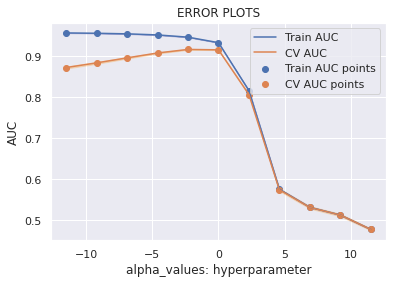

Best cross-validation score: 0.917
The best alpha from gridsearch : 0.1


In [ ]:
#finding the best alpha using grid serach
#we are already defined a function juct call it now
best_alpha=Grid_search(X_train,Y_train)

In [ ]:
#best alpha by grid search hyper parameter tuning
best_alpha

0.1

In [ ]:
#function for testing test data
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

def test_data(x_train,y_train,x_test,y_test):
    model=MultinomialNB(alpha=best_alpha)
    model.fit(x_train, y_train)
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

    sns.set()
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')
    plt.legend()
    plt.xlabel("False_positive_rate")
    plt.ylabel("True positive_rate")    
    plt.title("ROC_Curve")
    plt.grid()
    plt.show()
    print('The AUC_score of test_data is :',auc(test_fpr, test_tpr))

In [ ]:
#defining a function for computing the metric score
#Confusion matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def metric(x_train,y_train,x_test,y_test):
    model=MultinomialNB(alpha=best_alpha)
    model.fit(x_train, y_train)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(Y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

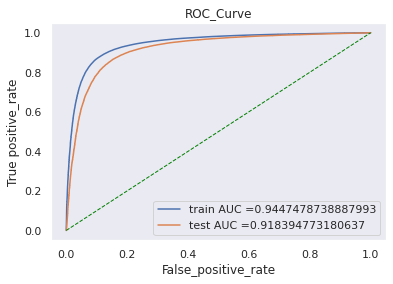

The AUC_score of test_data is : 0.918394773180637


In [ ]:
#test with test data we already defined a function just call the function
test_data(X_train,Y_train,X_test,Y_test)            

In [ ]:
# Top 10 important features of positive class 
feature_names=Vect.get_feature_names()
model=MultinomialNB(alpha=best_alpha)
model.fit(X_train, Y_train)
a=getattr(model, 'feature_log_prob_') #Return the value of the named attribute of object. name must be a string. If the string is the name of one of the object’s attributes
top =zip(a[1], feature_names)
top=list(top)
top.sort(key=lambda x: x[0])
l=len(top)
print('\nThe Top 10 Positive Class Features are :\n')
for i in range(1,11):
    print(top[l-i][1],end="\n")


The Top 10 Positive Class Features are :

not
like
tast
good
flavor
love
great
use
one
product


In [ ]:
# Top 10 important features of Negative class 
feature_names=Vect.get_feature_names()
model=MultinomialNB(alpha=best_alpha)
model.fit(X_train, Y_train)
a=getattr(model, 'feature_log_prob_') #Return the value of the named attribute of object. name must be a string. If the string is the name of one of the object’s attributes
top =zip(a[0], feature_names)
top=list(top)
top.sort(key=lambda x: x[0])
l=len(top)
print('\nThe Top 10 Negative Class Features are :\n')
for i in range(1,11):
    print(top[l-i][1],end="\n")


The Top 10 Negative Class Features are :

not
tast
like
product
would
one
flavor
tri
use
good


              precision    recall  f1-score   support

           0       0.67      0.71      0.69     17064
           1       0.95      0.94      0.94     92188

    accuracy                           0.90    109252
   macro avg       0.81      0.82      0.82    109252
weighted avg       0.90      0.90      0.90    109252



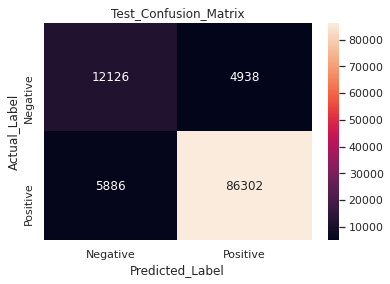

In [ ]:
# computing the Performance matrics.
# we already defined a function confusion matrix just call it.
metric(X_train,Y_train,X_test,Y_test)

# Applying NaviveBayes on TFIDF Features

In [ ]:
#define a function for splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(254919,) (254919,)
(109252,) (109252,)


In [ ]:
# difine the tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer(ngram_range=(2, 3),min_df=10)
X_train_tf_idf=tf_idf.fit_transform(X_train)
X_test_tf_idf=tf_idf.transform(X_test)
print(X_train_tf_idf.shape,Y_train.shape)
print(X_test_tf_idf.shape,Y_test.shape)

(254919, 174649) (254919,)
(109252, 174649) (109252,)


In [ ]:
X_train=X_train_tf_idf
X_test=X_test_tf_idf

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   18.0s finished


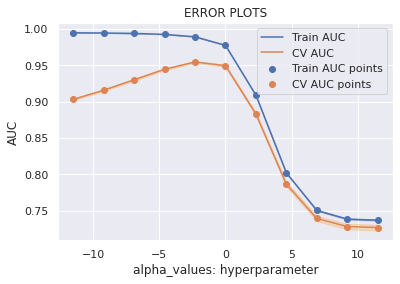

Best cross-validation score: 0.954
The best alpha from gridsearch : 0.1


In [ ]:
#compute best alpha using hyperparameter tuning 
#we have already defined a function Grid_search just call it
best_alpha=Grid_search(X_train,Y_train)

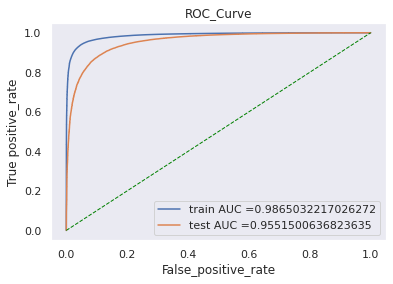

The AUC_score of test_data is : 0.9551500636823635


In [ ]:
#test with test data we already defined a function just call the function
test_data(X_train,Y_train,X_test,Y_test)

In [ ]:
# Top 10 important features of positive class 
feature_names=tf_idf.get_feature_names()
model=MultinomialNB(alpha=best_alpha)
model.fit(X_train, Y_train)
a=getattr(model, 'feature_log_prob_') #Return the value of the named attribute of object. name must be a string. If the string is the name of one of the object’s attributes
top =zip(a[1], feature_names)
top=list(top)
top.sort(key=lambda x: x[0])
l=len(top)
print('\nThe Top 10 Positive Class Features are :\n')
for i in range(1,11):
    print(top[l-i][1],end="\n")


The Top 10 Positive Class Features are :

high recommend
tast great
tast like
gluten free
groceri store
tast good
great product
not like
could not
great tast


In [ ]:
# Top 10 important features of Negative class 
feature_names=tf_idf.get_feature_names()
model=MultinomialNB(alpha=best_alpha)
model.fit(X_train, Y_train)
a=getattr(model, 'feature_log_prob_') #Return the value of the named attribute of object. name must be a string. If the string is the name of one of the object’s attributes
top =zip(a[0], feature_names)
top=list(top)
top.sort(key=lambda x: x[0])
l=len(top)
print('\nThe Top 10 Negative Class Features are :\n')
for i in range(1,11):
    print(top[l-i][1],end="\n")


The Top 10 Negative Class Features are :

tast like
not buy
would not
not even
wast money
could not
not like
not good
not tast
not recommend


              precision    recall  f1-score   support

           0       0.88      0.56      0.69     17004
           1       0.92      0.99      0.95     92248

    accuracy                           0.92    109252
   macro avg       0.90      0.77      0.82    109252
weighted avg       0.92      0.92      0.91    109252



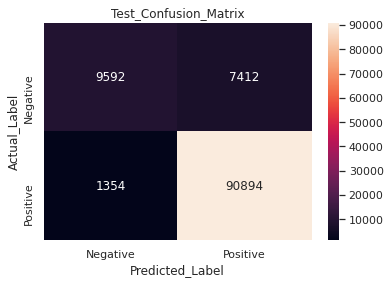

In [ ]:
# computing the Performance matrics.
# we already defined a function confusion matrix just call it.
metric(X_train,Y_train,X_test,Y_test)

# Conclusions

In [ ]:
from prettytable import PrettyTable
    
table = PrettyTable()
table.field_names = ["Vectorizer", "Feature engineering", " Hyper Parameter (alpha)", "AUC"]
table.add_row(["Bow", 'Featurized', 0.1,91.83 ])
table.add_row(["TFIDF", 'Featurized', 0.1, 95.51])
print(table)

+------------+---------------------+--------------------------+-------+
| Vectorizer | Feature engineering |  Hyper Parameter (alpha) |  AUC  |
+------------+---------------------+--------------------------+-------+
|    Bow     |      Featurized     |           0.1            | 91.83 |
|   TFIDF    |      Featurized     |           0.1            | 95.51 |
+------------+---------------------+--------------------------+-------+


# Observations

1. Compare to Bag of words features represntation , tf-idf features are got the highest 95.51% AUC score on Test data.
2. Both are having the 0.1 as the best alpha by Hyper parameter tuning.
3. Both models have resonabally works well for Amazon_food_reviews classification.